In [1]:

import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
target = dataset['stroke']
dataset.drop("stroke",axis=1, inplace=True)  
variables = dataset

In [8]:
 variables= variables.drop(columns= ['id'])

In [9]:
variables.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [10]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


In [11]:
variables['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [12]:
variables['bmi'].fillna(value=variables['bmi'].mean(),inplace=True) 

In [13]:
variables.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
dtype: bool

In [14]:
encode_x = LabelEncoder()

In [15]:
variables['age'] = encode_x.fit_transform(variables['age'])

variables = pd.concat( [variables, pd.get_dummies(variables['work_type'], prefix = 'work_type', drop_first = True)], axis = 1)
variables.drop(['work_type'], axis = 1, inplace = True)


variables = pd.concat( [variables, pd.get_dummies(variables['gender'], prefix = 'gender', drop_first = True)], axis = 1)
variables.drop(['gender'], axis = 1, inplace = True)

map_dict = {'Yes' : 1,'No' : 0}
variables['ever_married'] = variables['ever_married'].map(map_dict);

variables = pd.concat( [variables, pd.get_dummies(variables['Residence_type'], prefix = 'Residence_type', drop_first = True)], axis = 1)
variables.drop(['Residence_type'], axis = 1, inplace = True)


variables = pd.concat( [variables, pd.get_dummies(variables['smoking_status'], prefix = 'smoking_status', drop_first = True)], axis = 1)
variables.drop(['smoking_status'], axis = 1, inplace = True)




In [16]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   int64  
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   ever_married                    5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   work_type_Never_worked          5110 non-null   uint8  
 7   work_type_Private               5110 non-null   uint8  
 8   work_type_Self-employed         5110 non-null   uint8  
 9   work_type_children              5110 non-null   uint8  
 10  gender_Male                     5110 non-null   uint8  
 11  gender_Other                    5110 non-null   uint8  
 12  Residence_type_Urban            51

In [17]:
variables.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,gender_Other,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,88,0,1,1,228.69,36.600000,0,1,0,0,1,0,1,1,0,0
1,82,0,0,1,202.21,28.893237,0,0,1,0,0,0,0,0,1,0
2,101,0,1,1,105.92,32.500000,0,1,0,0,1,0,0,0,1,0
3,70,0,0,1,171.23,34.400000,0,1,0,0,0,0,1,0,0,1
4,100,1,0,1,174.12,24.000000,0,0,1,0,0,0,0,0,1,0


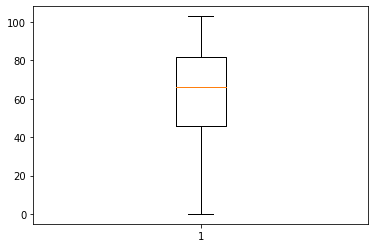

In [23]:
#age ,avg_glucose_level,bmi
plt.boxplot(variables["age"])
plt.show()

In [24]:
print(variables['bmi'].quantile(0.10))
print(variables['bmi'].quantile(0.90))

19.89
38.7


In [25]:
print(variables['avg_glucose_level'].quantile(0.10))
print(variables['avg_glucose_level'].quantile(0.90))
print(variables['avg_glucose_level'].skew())

Q1 = variables['avg_glucose_level'].quantile(0.25)
Q3 = variables['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

variables['avg_glucose_level'] = np.where(variables['avg_glucose_level'] <Min,19.2 ,variables['avg_glucose_level'])
variables['avg_glucose_level'] = np.where(variables['avg_glucose_level'] >Max,115.16500000000002 ,variables['avg_glucose_level'])

print(variables['avg_glucose_level'].skew())

65.789
192.18100000000007
1.5722838665030459
0.5099561647234176


In [26]:
print(variables['bmi'].quantile(0.10))
print(variables['bmi'].quantile(0.90))
print(variables['bmi'].skew())

Q1 = variables['bmi'].quantile(0.25)
Q3 = variables['bmi'].quantile(0.75)
IQR = Q3 - Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

variables['bmi'] = np.where(variables['bmi'] <Min, 19.2,variables['bmi'])
variables['bmi'] = np.where(variables['bmi'] >Max, 37.3,variables['bmi'])

print(variables['bmi'].skew())

19.89
38.7
1.0767160713842094
0.23459329559370137


In [27]:
variables['age']= variables['age'].astype(str).astype('float64')

variables['hypertension']= variables['hypertension'].astype(str).astype('float64')

variables['heart_disease']= variables['heart_disease'].astype(str).astype('float64')

variables['ever_married']= variables['ever_married'].astype(str).astype('float64')

variables['work_type_Never_worked']= variables['work_type_Never_worked'].astype(str).astype('float64')

variables['work_type_Private']= variables['work_type_Private'].astype(str).astype('float64')

variables['work_type_Self-employed']= variables['work_type_Self-employed'].astype(str).astype('float64')

variables['work_type_children']= variables['work_type_children'].astype(str).astype('float64')

variables['gender_Male']= variables['gender_Male'].astype(str).astype('float64')

variables['gender_Other']= variables['gender_Other'].astype(str).astype('float64')

variables['Residence_type_Urban']= variables['Residence_type_Urban'].astype(str).astype('float64')

variables['smoking_status_formerly smoked']= variables['smoking_status_formerly smoked'].astype(str).astype('float64')

variables['smoking_status_never smoked']= variables['smoking_status_never smoked'].astype(str).astype('float64')

variables['smoking_status_smokes']= variables['smoking_status_smokes'].astype(str).astype('float64')



In [28]:
target = target.astype(str).astype('float64')
target.dtypes

dtype('float64')

In [29]:
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.style.use('ggplot')

col_names = list(variables[['age', 'avg_glucose_level', 'bmi']])
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(variables[['age', 'avg_glucose_level', 'bmi']])
df_mm = pd.DataFrame(df_mm, columns=col_names)

variables.drop(['age'], axis = 1, inplace = True)
variables.drop(['avg_glucose_level'], axis = 1, inplace = True)
variables.drop(['bmi'], axis = 1, inplace = True)


variables = pd.concat( [df_mm, variables], axis = 1)

In [30]:
print(variables.shape)
print(target.shape)

(5110, 16)
(5110,)


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(variables, target, test_size = 0.2, random_state = 0)

print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088,)
(4088, 16)
(1022, 16)
(1022,)


In [32]:
RandomForestClassifierModel = RandomForestClassifier(n_estimators = 200,max_depth=20,random_state=21) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)
y_pred = RandomForestClassifierModel.predict(X_test)
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train)*100)
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test)*100)

RandomForestClassifierModel Train Score is :  100.0
RandomForestClassifierModel Test Score is :  94.6183953033268


In [33]:
from sklearn import metrics
y_pred = RandomForestClassifierModel.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9461839530332681


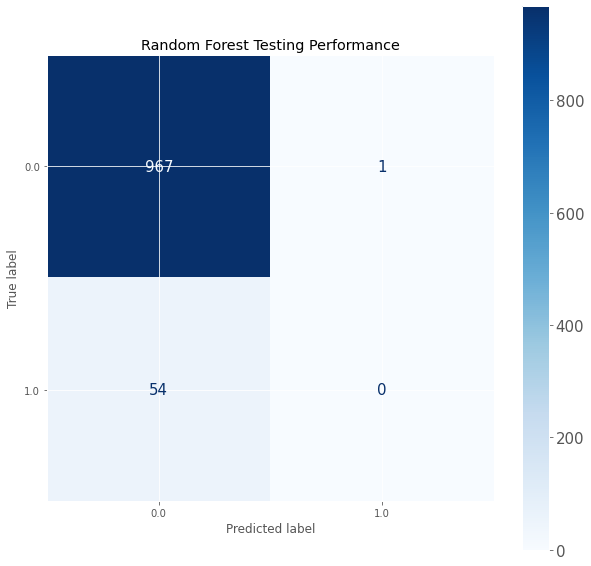

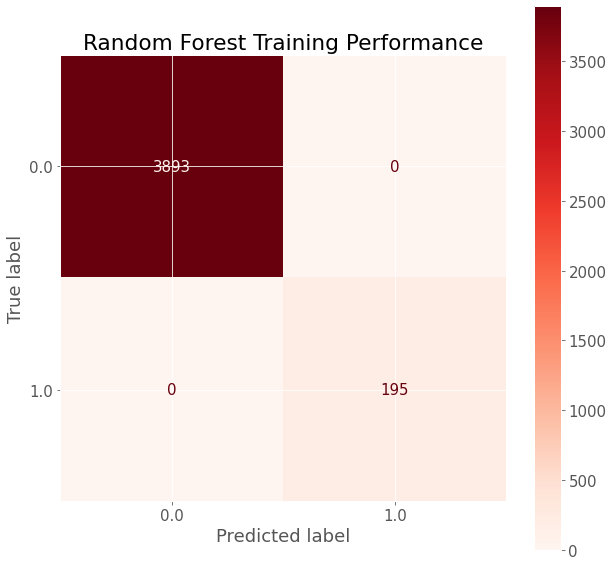

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Random Forest Testing Performance');
plt.rcParams.update({'font.size': 15})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RandomForestClassifierModel, X_test, y_test ,ax=ax,cmap=plt.cm.Blues) 
plt.savefig('Random Forest Testing Performance.png')
plt.show()


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Random Forest Training Performance');
plt.rcParams.update({'font.size': 15})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RandomForestClassifierModel, X_train, y_train,ax=ax,cmap=plt.cm.Reds) 
plt.savefig('Random Forest Training Performance.png')
plt.show()